In [1]:
# Loading required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (14, 8)

In [16]:
# Reading the CSV file as a dataframe using pandas
matches=pd.read_csv('matches.csv')

In [17]:
# No. of rows and columns in the dataframe
matches.shape

(756, 18)

In [18]:
matches.head

<bound method NDFrame.head of         id  season           city        date                        team1  \
0        1    2017      Hyderabad  2017-04-05          Sunrisers Hyderabad   
1        2    2017           Pune  2017-04-06               Mumbai Indians   
2        3    2017         Rajkot  2017-04-07                Gujarat Lions   
3        4    2017         Indore  2017-04-08       Rising Pune Supergiant   
4        5    2017      Bangalore  2017-04-08  Royal Challengers Bangalore   
..     ...     ...            ...         ...                          ...   
751  11347    2019         Mumbai    05/05/19        Kolkata Knight Riders   
752  11412    2019        Chennai    07/05/19          Chennai Super Kings   
753  11413    2019  Visakhapatnam    08/05/19          Sunrisers Hyderabad   
754  11414    2019  Visakhapatnam    10/05/19               Delhi Capitals   
755  11415    2019      Hyderabad    12/05/19               Mumbai Indians   

                           team2 

In [19]:
matches.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [20]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [21]:
matches['season'].unique()

array([2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2018,
       2019], dtype=int64)

In [22]:
max(matches['win_by_runs'])

146

In [23]:
# Match won by the maximum margin of runs
matches.iloc[matches['win_by_runs'].idxmax()]

id                               44
season                         2017
city                          Delhi
date                     2017-05-06
team1                Mumbai Indians
team2              Delhi Daredevils
toss_winner        Delhi Daredevils
toss_decision                 field
result                       normal
dl_applied                        0
winner               Mumbai Indians
win_by_runs                     146
win_by_wickets                    0
player_of_match         LMP Simmons
venue              Feroz Shah Kotla
umpire1                 Nitin Menon
umpire2                   CK Nandan
umpire3                         NaN
Name: 43, dtype: object

In [24]:
max(matches['win_by_wickets'])

10

In [25]:
# Match won by maximum wickets
matches.iloc[matches['win_by_wickets'].idxmax()]

id                                                      3
season                                               2017
city                                               Rajkot
date                                           2017-04-07
team1                                       Gujarat Lions
team2                               Kolkata Knight Riders
toss_winner                         Kolkata Knight Riders
toss_decision                                       field
result                                             normal
dl_applied                                              0
winner                              Kolkata Knight Riders
win_by_runs                                             0
win_by_wickets                                         10
player_of_match                                   CA Lynn
venue              Saurashtra Cricket Association Stadium
umpire1                                       Nitin Menon
umpire2                                         CK Nandan
umpire3       

In [26]:
# Match won by minimum margin of runs (not by 1 run)
matches.iloc[matches[matches['win_by_runs'].ge(1)].win_by_runs.idxmin()]

id                                                        59
season                                                  2017
city                                               Hyderabad
date                                              2017-05-21
team1                                         Mumbai Indians
team2                                 Rising Pune Supergiant
toss_winner                                   Mumbai Indians
toss_decision                                            bat
result                                                normal
dl_applied                                                 0
winner                                        Mumbai Indians
win_by_runs                                                1
win_by_wickets                                             0
player_of_match                                    KH Pandya
venue              Rajiv Gandhi International Stadium, Uppal
umpire1                                             NJ Llong
umpire2                 

In [27]:
# Match won by minimum wickets (not by 0 wickets)
matches.iloc[matches[matches['win_by_wickets'].ge(1)].win_by_wickets.idxmin()]

id                                   560
season                              2015
city                             Kolkata
date                          2015-05-09
team1                    Kings XI Punjab
team2              Kolkata Knight Riders
toss_winner              Kings XI Punjab
toss_decision                        bat
result                            normal
dl_applied                             0
winner             Kolkata Knight Riders
win_by_runs                            0
win_by_wickets                         1
player_of_match               AD Russell
venue                       Eden Gardens
umpire1                     AK Chaudhary
umpire2                  HDPK Dharmasena
umpire3                              NaN
Name: 559, dtype: object

In [28]:
matches['dl_applied'].unique()

array([0, 1], dtype=int64)

In [29]:
# Matches where D/L method was and wasn't applied
# 0 indicates normal match with no D/L method applied and 1 indicates a rain curtailed match with D/L method being applied
matches['dl_applied'].value_counts()

0    737
1     19
Name: dl_applied, dtype: int64

In [30]:
# % of matches with and without D/L method (0 for no D/L and 1 for D/L method applied)
round(matches['dl_applied'].value_counts()/matches['dl_applied'].count()*100, 2)

0    97.49
1     2.51
Name: dl_applied, dtype: float64

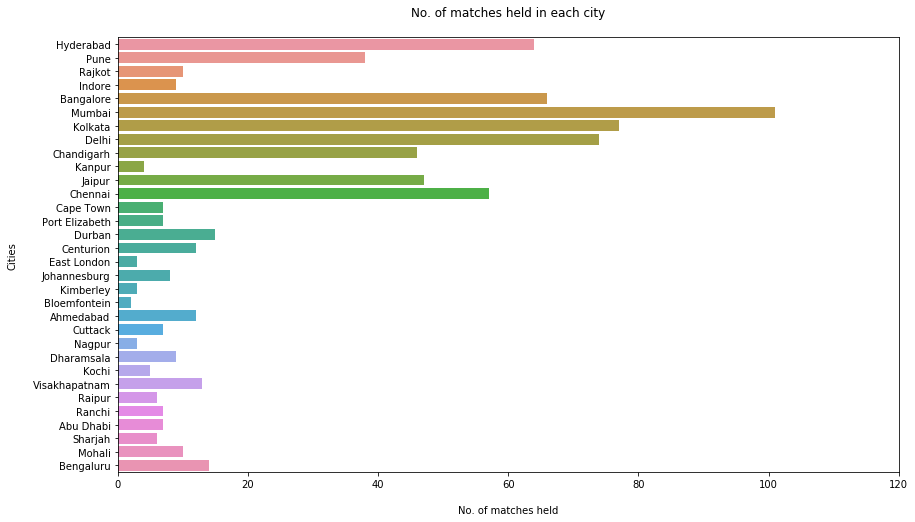

In [31]:
# Plot to visualise the no. of matches held in each city
sns.countplot(y='city', data=matches)
plt.title('No. of matches held in each city\n')
plt.xlabel('\nNo. of matches held')
plt.ylabel('Cities\n')
plt.xlim([0,120])
plt.show()

In [32]:
# No. of matches won by each team
matches['winner'].value_counts()

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Delhi Capitals                  10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: winner, dtype: int64

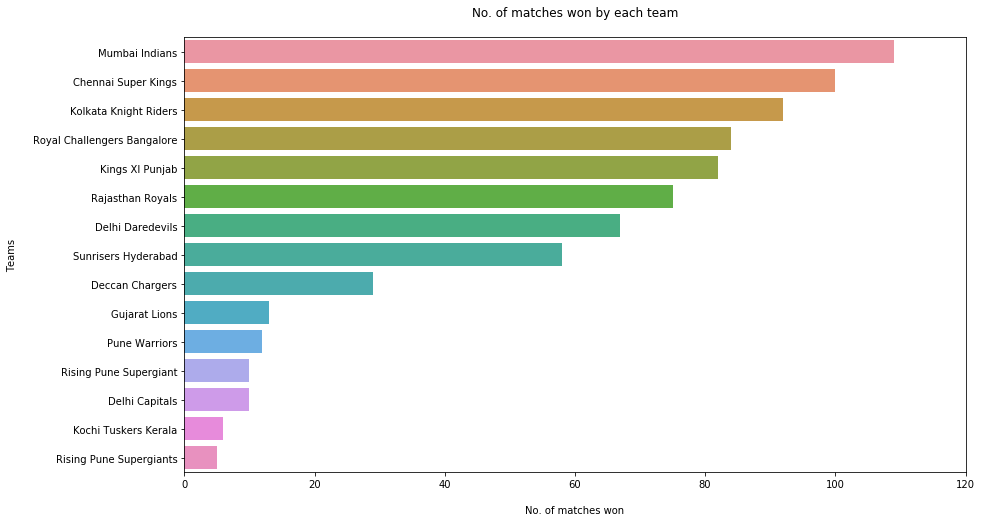

In [33]:
# Plot to visualise the no. of matches won by each team
data=matches['winner'].value_counts()
fig, ax=plt.subplots()
ax.set_xlim([0,120])
sns.barplot(y=data.index, x=data, orient='h')
plt.title('No. of matches won by each team\n')
plt.xlabel("\nNo. of matches won")
plt.ylabel('Teams\n')
plt.show()

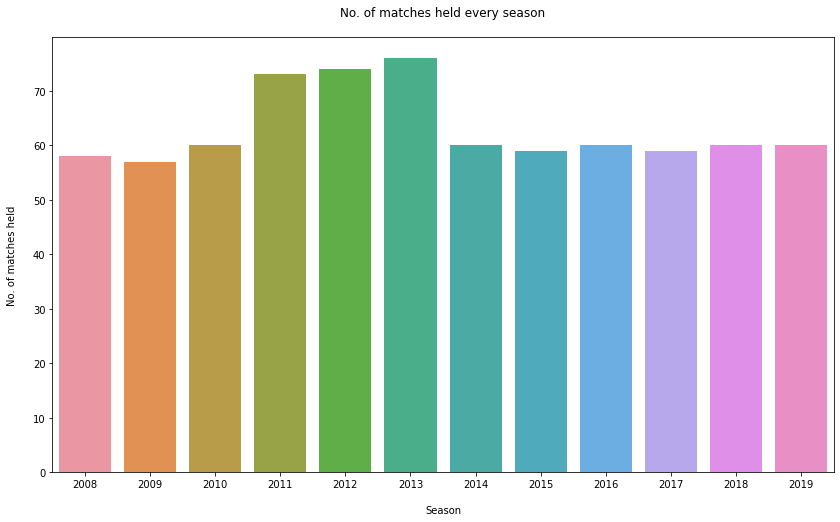

In [34]:
# Plot to visualise the no. of matches held every season
sns.countplot(x='season', data=matches)
plt.title('No. of matches held every season\n')
plt.xlabel('\nSeason')
plt.ylabel('No. of matches held\n')
plt.show()

In [35]:
# Picking the top 10 players based on the no. of Man of Match (MOM) awards won
mom=matches['player_of_match'].value_counts()[:10]
mom

CH Gayle          21
AB de Villiers    20
RG Sharma         17
DA Warner         17
MS Dhoni          17
YK Pathan         16
SR Watson         15
SK Raina          14
G Gambhir         13
V Kohli           12
Name: player_of_match, dtype: int64

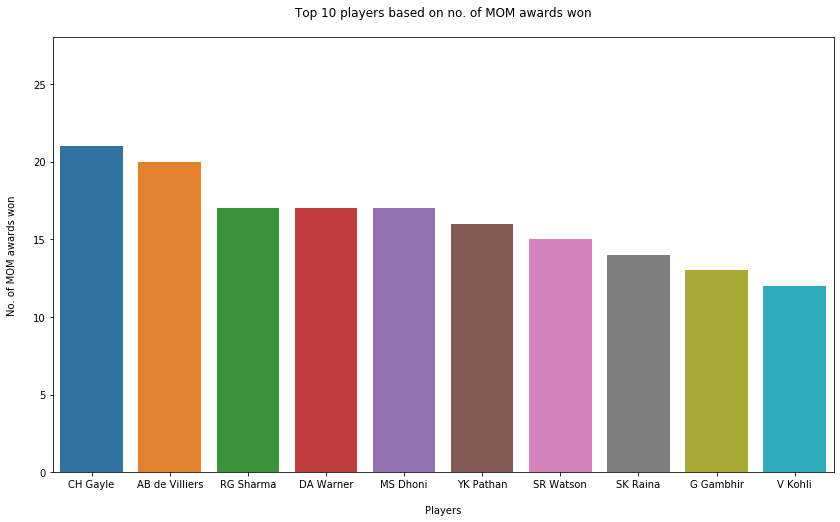

In [36]:
# Plot to visualise the top 10 players based on the no. of MOM awards won
fig, ax=plt.subplots()
ax.set_ylim([0,28])
ax.set_title('Top 10 players based on no. of MOM awards won\n')
sns.barplot(x=mom.index, y=mom, orient='v')
plt.ylabel('No. of MOM awards won\n')
plt.xlabel('\nPlayers')
plt.show()

In [37]:
# Does winning the toss mean winning the match?
winnerwinner=matches['toss_winner']== matches['winner']
winnerwinner.groupby(winnerwinner).size()

False    363
True     393
dtype: int64

In [38]:
# % of games where the toss winning team lost the match (indicated by false) and toss winning team won the match(indicated by true)
round(winnerwinner.groupby(winnerwinner).size() / winnerwinner.count() * 100,2)

False    48.02
True     51.98
dtype: float64

In [39]:
# How many times did the captain choose fielding and batting after winning the toss?
matches['toss_decision'].value_counts()

field    463
bat      293
Name: toss_decision, dtype: int64

In [40]:
# % of matches where the toss winning team's captain chose fielding and batting
round(matches['toss_decision'].value_counts()/matches['toss_decision'].count()*100, 2)

field    61.24
bat      38.76
Name: toss_decision, dtype: float64

In [41]:
## Stadiums which have hosted D/L method applied matches 
matches.query('dl_applied==1')['venue']

56                                 M Chinnaswamy Stadium
99                                      Feroz Shah Kotla
102                                         Eden Gardens
119                                             Newlands
122                                            Kingsmead
148                                      SuperSport Park
251                                        Nehru Stadium
280                                         Eden Gardens
290                                M Chinnaswamy Stadium
488                                     Feroz Shah Kotla
536    Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...
567            Rajiv Gandhi International Stadium, Uppal
597            Rajiv Gandhi International Stadium, Uppal
620                                         Eden Gardens
624    Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...
625                                M Chinnaswamy Stadium
641                               Sawai Mansingh Stadium
653                            

In [42]:
# Cities which have witnessed D/L method applied matches
matches.query('dl_applied==1')['city']

56         Bangalore
99             Delhi
102          Kolkata
119        Cape Town
122           Durban
148        Centurion
251            Kochi
280          Kolkata
290        Bangalore
488            Delhi
536    Visakhapatnam
567        Hyderabad
597        Hyderabad
620          Kolkata
624    Visakhapatnam
625        Bangalore
641           Jaipur
653          Kolkata
667            Delhi
Name: city, dtype: object

In [43]:
# Seasons with D/L method applied matches
year=matches.query('dl_applied==1')['season']
year

56     2017
99     2008
102    2008
119    2009
122    2009
148    2009
251    2011
280    2011
290    2011
488    2014
536    2015
567    2015
597    2016
620    2016
624    2016
625    2016
641    2018
653    2018
667    2018
Name: season, dtype: int64

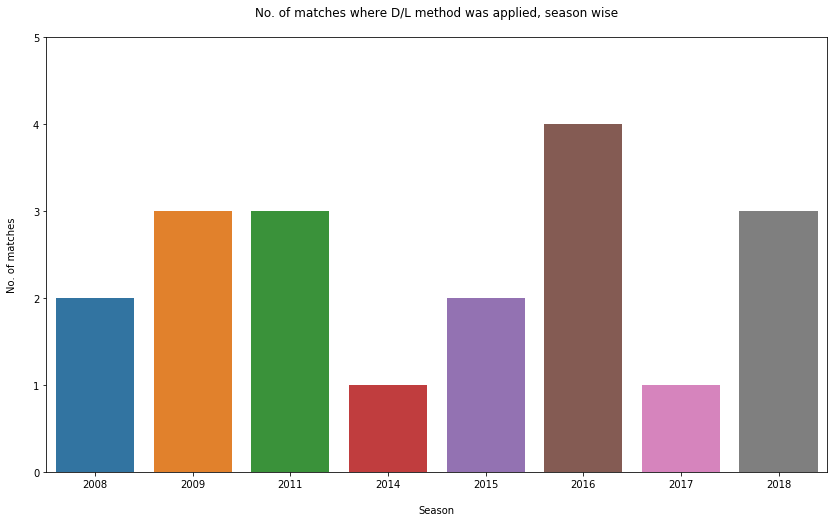

In [44]:
# Plot to visualise the no. of matches where D/L method was applied season wise
fig, ax=plt.subplots()
ax.set_ylim([0,5])
ax.set_title('No. of matches where D/L method was applied, season wise\n')
sns.countplot(x=year, data=matches)
plt.xlabel('\nSeason')
plt.ylabel('No. of matches\n')
plt.show()

In [45]:
# Different results for games
matches['result'].value_counts()

normal       743
tie            9
no result      4
Name: result, dtype: int64

In [46]:
# How many times did each team win the toss?
matches['toss_winner'].value_counts()

Mumbai Indians                 98
Kolkata Knight Riders          92
Chennai Super Kings            89
Royal Challengers Bangalore    81
Kings XI Punjab                81
Delhi Daredevils               80
Rajasthan Royals               80
Sunrisers Hyderabad            46
Deccan Chargers                43
Pune Warriors                  20
Gujarat Lions                  15
Delhi Capitals                 10
Kochi Tuskers Kerala            8
Rising Pune Supergiants         7
Rising Pune Supergiant          6
Name: toss_winner, dtype: int64

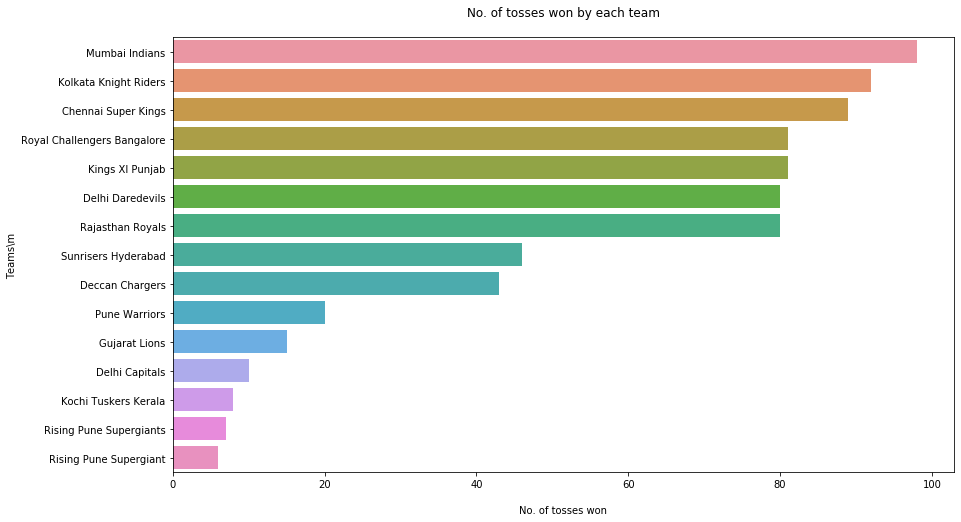

In [47]:
# Plot to visualise the no. of tosses won by each team
toss=matches['toss_winner'].value_counts()
fig, ax=plt.subplots()
ax.set_title('No. of tosses won by each team\n')
sns.barplot(y=toss.index, x=toss, orient='h')
plt.xlabel('\nNo. of tosses won')
plt.ylabel('Teams\m')
plt.show()

In [48]:
# Best venue for defending your total
matches.venue[matches.win_by_runs!=0].mode()

0    Wankhede Stadium
dtype: object

In [49]:
# Best venue to chase a total
matches.venue[matches.win_by_wickets!=0].mode()

0    Eden Gardens
dtype: object

In [50]:
# Best defending team
matches.winner[matches.win_by_runs!=0].mode()

0    Mumbai Indians
dtype: object

In [51]:
# Best chasing team
matches.winner[matches.win_by_wickets!=0].mode()

0    Kolkata Knight Riders
dtype: object

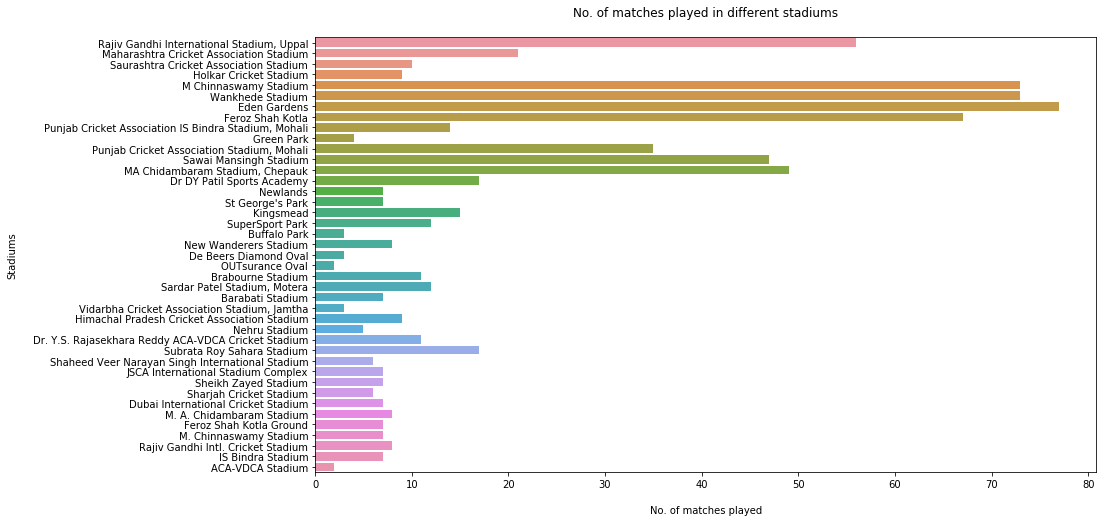

In [52]:
# No. of matches played in different stadiums
sns.countplot(y='venue', data=matches)
plt.title('No. of matches played in different stadiums\n')
plt.xlabel('\nNo. of matches played')
plt.ylabel('Stadiums\n')
plt.show()

# End